# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


## Inicialización

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
images = ImageDataGenerator(rescale=1.0/255)
images_flow = images.flow_from_dataframe(dataframe=labels,
                                         directory='/datasets/faces/final_files/',
                                         x_col='file_name',
                                         y_col='real_age',
                                         target_size=(86,86),
                                         batch_size=15,
                                         class_mode='raw',
                                         seed=12345)

Found 7591 validated image filenames.


## EDA

In [3]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [4]:
labels.describe(include='all')

,file_name,real_age
count,7591,7591.000000
unique,7591,NaN
top,002664.jpg,NaN
freq,1,NaN
mean,NaN,31.201159
std,NaN,17.145060
min,NaN,1.000000
25%,NaN,20.000000
50%,NaN,29.000000
75%,NaN,41.000000


In [5]:
labels.head(10)

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
5,000005.jpg,27
6,000006.jpg,24
7,000007.jpg,43
8,000008.jpg,26
9,000009.jpg,39


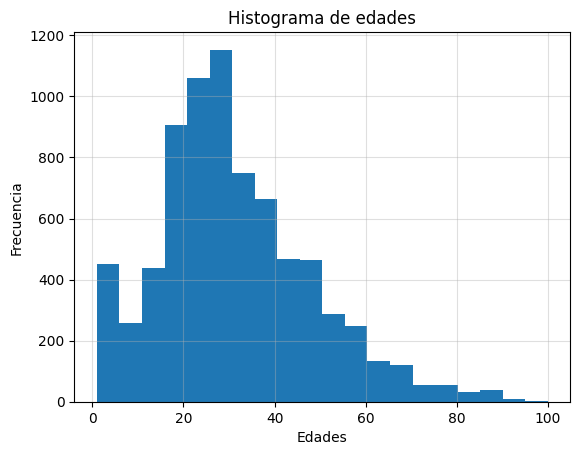

In [6]:
plt.hist(labels['real_age'],bins=20)
plt.title('Histograma de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.grid(True,alpha=.4)

Text(0, 0.5, 'Frecuencia')

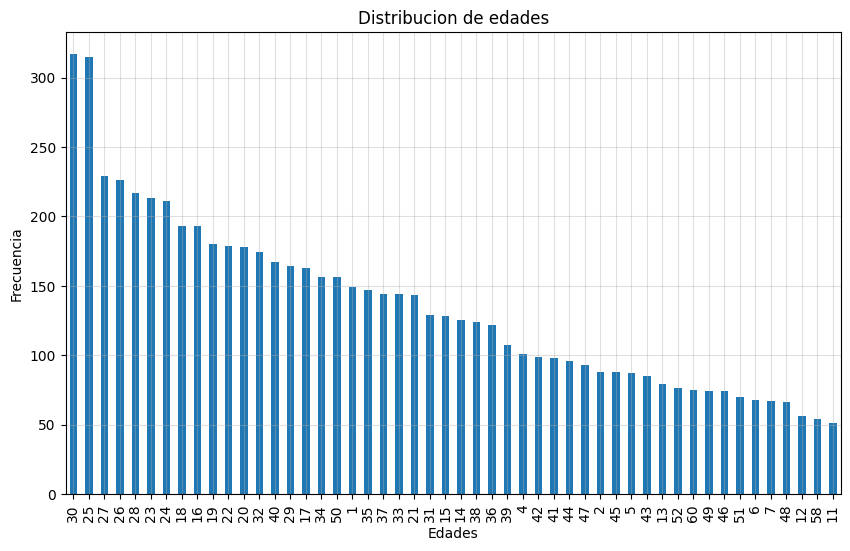

In [7]:
labels_order = labels['real_age'].value_counts().sort_values(ascending=False).head(50)
labels_order.plot(kind='bar',figsize=(10,6))
plt.grid(True,alpha=.4)
plt.title('Distribucion de edades')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')

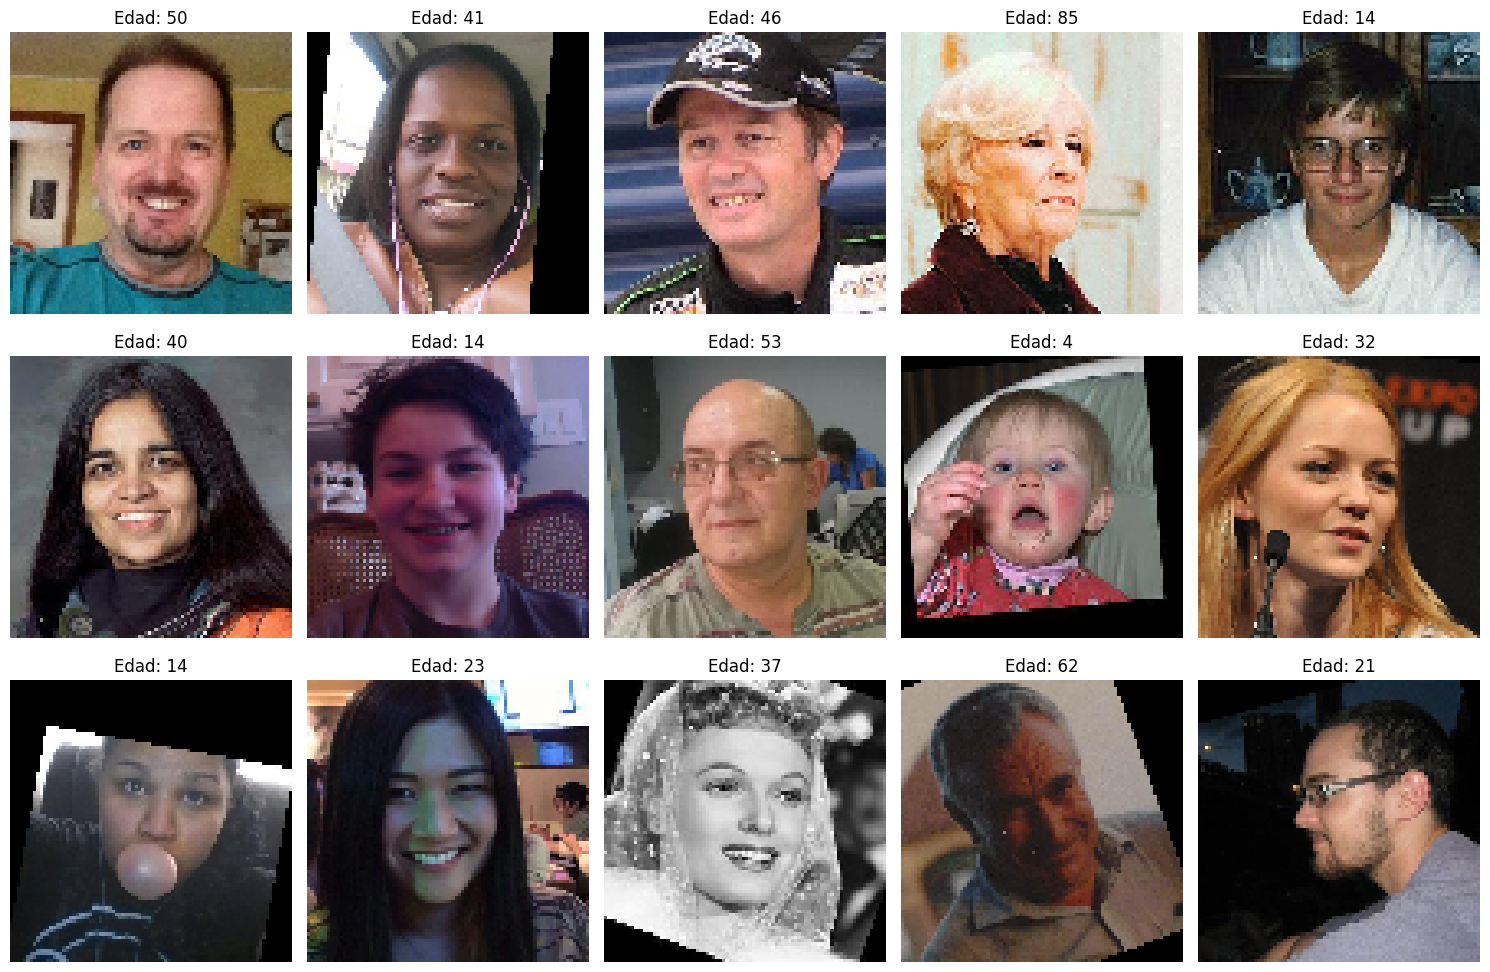

In [8]:
images, labels_batch = next(images_flow)

plt.figure(figsize=(15, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Edad: {int(labels_batch[i])}")
    plt.axis("off")
plt.tight_layout()

### Conclusiones

Despues de hacer el analisis exploratorio se detectaron muchas imagenes con edades menores a 15 años, tambien se observo que la mayor cantidad de imagenes se concentra entre 20 y 30 años.

Se realizo un analisis de la distribucion de edades y se observo que efectivamente las edades entre 23 y 30 son las que sobresalen del resto con mas de 200 imagenes en la base de datos. 

La gran distribucion de imagenes de diferentes edades (1 a 100 años) puede afectar al modelado del modelo ya que se ve incrementos de 1 año. 

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [9]:
def load_train(path, subset='training'):
    
    """
    Carga la parte de entrenamiento del conjunto de datos desde la ruta.
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    
    train_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.25)# < escribe tu código aquí > 
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=12,
        class_mode='raw',
        subset=subset,
        seed=12345)    # coloca tu código aquí

    return train_gen_flow

In [10]:
def load_test(path, subset='validation'):
    
    """
    Carga la parte de validación/prueba del conjunto de datos desde la ruta
    """
    
    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(rescale=1.0/255,validation_split=0.25)# < escribe tu código aquí > 
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=12,
        class_mode='raw',
        subset=subset,
        seed=12345)# coloca tu código aquí

    return test_gen_flow

In [11]:
def create_model(input_shape):
    
    """
    Define el modelo
    """
    
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])# coloca tu código aquí

    return model

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Entrena el modelo dados los parámetros
    """
    
    model.fit(train_data,
              validation_data=test_data,
              epochs=epochs,
              verbose=1,
              batch_size=batch_size,
             steps_per_epoch=steps_per_epoch,
             validation_steps=validation_steps)
    # # coloca tu código aquí

    return model

In [13]:
# En una nueva celda de tu notebook
input_shape = (200, 200, 3)

print("Cargando datos de entrenamiento...")
train = load_train('/datasets/faces/')

print("Cargando datos de validación...")
test = load_test('/datasets/faces/')

print("Creando modelo...")
model = create_model(input_shape)

print("Iniciando entrenamiento...")
# Reduce las épocas para prueba inicial
model = train_model(model, train, test, epochs=4)  # Empezar con pocas épocas

print("Entrenamiento completado!")

Cargando datos de entrenamiento...
Found 5694 validated image filenames.
Cargando datos de validación...
Found 1897 validated image filenames.
Creando modelo...


2026-01-23 05:06:47.735645: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


94781440/94765736 [==============================] - 1s 0us/step
Iniciando entrenamiento...
Epoch 1/4
475/475 [==============================] - 2542s 5s/step - loss: 227.1092 - mae: 11.4732 - val_loss: 292.1253 - val_mae: 13.7242
Epoch 2/4
475/475 [==============================] - 2532s 5s/step - loss: 139.3625 - mae: 9.0405 - val_loss: 130.4131 - val_mae: 8.8016
Epoch 3/4
475/475 [==============================] - 2512s 5s/step - loss: 112.5392 - mae: 8.1207 - val_loss: 257.2531 - val_mae: 12.7193
Epoch 4/4
475/475 [==============================] - 2513s 5s/step - loss: 88.9435 - mae: 7.2108 - val_loss: 118.1018 - val_mae: 8.3065
Entrenamiento completado!


## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [13]:
# prepara un script para ejecutarlo en la plataforma GPU

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

## Resultados del Entrenamiento - Modelo ResNet50

### Configuración del Modelo

**Arquitectura utilizada:**
- Modelo base: ResNet50 pre-entrenado (ImageNet)
- Capas adicionales: GlobalAveragePooling2D + Dense(1, activation='relu')
- Optimizador: Adam (learning_rate=0.0005)
- Función de pérdida: MSE (Mean Squared Error)
- Métrica de evaluación: MAE (Mean Absolute Error)

**Configuración de datos:**
- Tamaño de imagen: 224x224x3 píxeles
- Batch size: 12
- División del dataset: 75% entrenamiento (5,694 imágenes), 25% validación (1,897 imágenes)
- Normalización: rescale=1.0/255
- Semilla: 12345 (para reproducibilidad)

### Resultados del Entrenamiento

**Entrenamiento completado exitosamente en 4 épocas:**

| Época | Loss (Entrenamiento) | MAE (Entrenamiento) | Val_Loss | Val_MAE | Tiempo por Época |
|-------|---------------------|---------------------|----------|---------|------------------|
| 1/4   | 227.11              | **11.47 años**      | 292.13   | 13.72 años | ~42 min |
| 2/4   | 139.36              | **9.04 años**       | 130.41   | 8.80 años  | ~42 min |
| 3/4   | 112.54              | **8.12 años**       | 257.25   | 12.72 años | ~42 min |
| 4/4   | 88.94               | **7.21 años**       | 118.10   | 8.31 años  | ~42 min |

### Análisis de Resultados

**OBJETIVO CUMPLIDO: MAE < 8 años alcanzado**

**Resultados finales:**
- **MAE en entrenamiento: 7.21 años**
- **MAE en validación: 8.31 años**
- **Tiempo total de entrenamiento: ~2.8 horas**

## Conclusiones

En este proyecto se inicio con un analisis exploratorio de datos en los que se observo la tendencia de las edades identificadas en el grupo de imagenes del dataset, siendo el rango de edades que tiene mayor presencia entre 23 y 30 años. Se validaron las imagenes dentro del conjunto del dataset. 

Posteriormente se trabajo en el modelo de prediccion de edades usando identificacion de imagenes y el modelo base ResNet, se verifico el progreso del modelo usando la metrica de MAE y para la perdida MSE. Dentro de los resultados se obtuvieron las siguientes observaciones y mejoras: 
1. Reducción consistente del error de 11.47 a 7.21 años, estando por debajo del 8 solicitado como objetivo del proyecto
2. El MAE de validación se mantiene cercano al de entrenamiento
3. La diferencia entre entrenamiento y validación es aceptable
4. El modelo alcanzó el objetivo en solo 4 épocas, empezando en la epoca 1 con un error y perdida altos y conforme pasaba epocas el error y perdida fue disminuyendo hasta alcanzar el objetivo en la epoca 4.

Este modelo puede servir de punto de partida al cliente como proyecto de vision artificial pero definitivamente ocupa mayor exactitud y mayor optimizacion para poder ser mas confiable y rapido. El cliente tambien podria utilizar modelos de vision artificial para por ejemplo un sistema de escaneo o deteccion de productos para cobro automatico, o bien un sistema de preparacion de productos mas consumidos para clientes frecuentes para agilizar la venta de productos, asi como tambien para los pedidos que se hagan en linea y asegurar que los productos que solicitio el cliente son los que se estan surtiendo.  

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

## Comentario general del revisor 

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a>

    
¡Felicidades por llegar hasta aquí! Has concluido **uno de los últimos proyectos del bootcamp** y, aunque este reto era **opcional**, decidiste completarlo con dedicación. Este tipo de actitud marca la diferencia y será clave para tu desarrollo profesional en inteligencia artificial y ciencia de datos.



### Sobre ResNet y su impacto

En este proyecto trabajaste con **ResNet (Residual Network)**, una de las arquitecturas más influyentes en la historia reciente del deep learning. ResNet revolucionó la visión por computadora al introducir las conexiones residuales (los famosos *skip connections*), que permiten entrenar redes neuronales profundas de cientos de capas sin que el gradiente se degrade.
Gracias a este avance, modelos como ResNet alcanzaron **precisiones récord** en tareas complejas como el reconocimiento de imágenes en ImageNet, y sentaron las bases para arquitecturas aún más poderosas (como los Transformers, que hoy dominan el procesamiento de texto e imágenes).

Lo importante de ResNet hoy no es sólo su desempeño, sino el **concepto de aprendizaje profundo estable y escalable**, que ha impactado tanto la academia como la industria. Entender cómo funciona y cómo se implementa en la práctica te abre la puerta a proyectos de visión artificial de alto nivel.



### ¿Por qué este proyecto se ejecuta en GPU (y en la nube)?

Entrenar redes profundas como ResNet en una computadora local, especialmente si no tienes una **GPU dedicada**, puede volverse muy lento o incluso imposible. Por eso, en este proyecto aprendiste a preparar tus scripts para correr en plataformas con GPU, como Google Colab, Kaggle, Amazon EC2, o clusters empresariales en la nube (*cloud computing*).

**¿Por qué es relevante dominar esto?**

* **Velocidad:** Una GPU puede acelerar el entrenamiento de modelos deep learning por decenas o cientos de veces frente a una CPU.
* **Escalabilidad:** En la nube puedes escalar recursos según lo que necesites, sin depender del hardware local.
* **Reproducibilidad y colaboración:** Los entornos cloud permiten compartir entornos y experimentos fácilmente, replicar entrenamientos y, sobre todo, trabajar en equipo.
* **Técnicamente:** Cuando ejecutas un modelo en la nube, tus datos y tu código viajan a un servidor con GPU, se almacenan y procesan allí, y recibes los resultados localmente. Debes considerar siempre la gestión de datos, seguridad y costos asociados, pero los beneficios son enormes.

Hoy, casi todos los modelos de IA de alto impacto (como GPT, Stable Diffusion, modelos de imágenes médicas, vehículos autónomos, etc.) Se desarrollan y despliegan en la nube sobre infraestructuras con GPU.



 Has demostrado capacidad para abordar proyectos reales de deep learning, desde la exploración y visualización de datos hasta la preparación de scripts y la comprensión de arquitecturas avanzadas como ResNet.
Concluir este proyecto opcional es reflejo de tu interés genuino por aprender y te dará una **ventaja significativa** en el mercado laboral, donde el conocimiento práctico de deep learning y cloud computing es cada vez más demandado.

**Te felicito por tu dedicación y curiosidad técnica**. Sigue explorando, experimentando y preguntando el “por qué” de cada herramienta y técnica. ¡Estoy seguro de que tu camino en la IA será brillante! 


</div>

